# 1. Question answering model

## 1.1 Import modules



In [1]:
!pip install transformers
!pip install sentencepiece
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 14.6 MB/s 
     |████████████████████████████████| 596 kB 11.3 MB/s 
     |████████████████████████████████| 101 kB 6.0 MB/s 
     |████████████████████████████████| 6.6 MB 28.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 23.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install transformers datasets huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 26.1 MB/s 
     |████████████████████████████████| 141 kB 59.7 MB/s 
     |████████████████████████████████| 212 kB 55.1 MB/s 
     |████████████████████████████████| 115 kB 66.2 MB/s 
     |████████████████████████████████| 127 kB 69.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
!curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs | sh
!git clone https://github.com/huggingface/tokenizers
!pip install setuptools_rust
!python setup.py install
!pip install git+https://github.com/huggingface/transformers


info: downloading installer
sh: 147: cannot open /dev/tty: No such device or address
Cloning into 'tokenizers'...
remote: Enumerating objects: 15558, done.
remote: Counting objects: 100% (2315/2315), done.
remote: Compressing objects: 100% (1069/1069), done.
remote: Total 15558 (delta 1518), reused 1838 (delta 1207), pack-reused 13243
Receiving objects: 100% (15558/15558), 7.76 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (10151/10151), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 9.7 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0


python3: can't open file 'setup.py': [Errno 2] No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-xj46oh0v
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-xj46oh0v
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.22.0.dev0-py3-none-any.whl size=4728457 sha256=af2896c3e1fe2abe9b30c0508c4d40a7333e9000c37cb0576d8e557c21c5b221
  Stored in directory: /tmp/pip-ephem-wheel-cache-8wziwz3u/wheels/35/2e/a7/d819e3310040329f0f47e57c9e3e7a7338aa5e74c49acfe522
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.21.1
    Uninstalling transformers-4.21.1:
      Successfully uninstalled transformers-4.21.1


In [4]:
import transformers

print(transformers.__version__)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

4.22.0.dev0


## 1.2 Load Dataset


In [5]:
squad_v2 = False
model_checkpoint = "distilbert-base-uncased"
batch_size = 16

In [6]:
from datasets import load_dataset, load_metric

In [7]:
datasets = load_dataset("squad_v2" if squad_v2 else "squad")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [ ]:
datasets = load_dataset("squad_v2" if squad_v2 else "squad")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
datasets["train"][0]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [ ]:
from datasets import ClassLabel, Sequence
import random
import pandas as pd
from IPython.display import display, HTML


def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(
        dataset
    ), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset) - 1)
        while pick in picks:
            pick = random.randint(0, len(dataset) - 1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
        elif isinstance(typ, Sequence) and isinstance(typ.feature, ClassLabel):
            df[column] = df[column].transform(
                lambda x: [typ.feature.names[i] for i in x]
            )
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(datasets["train"]).head


,id,title,context,question,answers
0,56d385c459d6e41400146629,American_Idol,"American Idol premiered in June 2002 and became the surprise summer hit show of 2002. The first show drew 9.9 million viewers, giving Fox the best viewing figure for the 8.30 pm spot in over a year. The audience steadily grew, and by finale night, the audience had averaged 23 million, with more than 40 million watching some part of that show. That episode was placed third amongst all age groups, but more importantly it led in the 18–49 demographic, the age group most valued by advertisers.",What year did American Idol being to air on television?,"{'text': ['2002'], 'answer_start': [32]}"
1,56cf4e5faab44d1400b88f92,Frédéric_Chopin,"Chopin's life and his relations with George Sand have been fictionalized in numerous films. The 1945 biographical film A Song to Remember earned Cornel Wilde an Academy Award nomination as Best Actor for his portrayal of the composer. Other film treatments have included: La valse de l'adieu (France, 1928) by Henry Roussel, with Pierre Blanchar as Chopin; Impromptu (1991), starring Hugh Grant as Chopin; La note bleue (1991); and Chopin: Desire for Love (2002).",What year was La valse de l'adieu released?,"{'text': ['1928'], 'answer_start': [301]}"
2,573055ee8ab72b1400f9c47e,Windows_8,"In May 2014, the Government of China banned the internal purchase of Windows 8-based products under government contracts requiring ""energy-efficient"" devices. The Xinhua News Agency claimed that Windows 8 was being banned in protest of Microsoft's support lifecycle policy and the end of support for Windows XP (which, as of January 2014, had a market share of 49% in China), as the government ""obviously cannot ignore the risks of running OS [sic] without guaranteed technical support."" However, Ni Guangnan of the Chinese Academy of Sciences had also previously warned that Windows 8 could allegedly expose users to surveillance by the United States government due to its heavy use of internet-based services.",When did the Chinese government ban the purchase of Windows 8 products?,"{'text': ['May 2014'], 'answer_start': [3]}"
3,5727b9224b864d1900163b7b,Tibet,"Tibet (i/tᵻˈbɛt/; Wylie: Bod, pronounced [pʰø̀ʔ]; Chinese: 西藏; pinyin: Xīzàng) is a region on the Tibetan Plateau in Asia. It is the traditional homeland of the Tibetan people as well as some other ethnic groups such as Monpa, Qiang and Lhoba peoples and is now also inhabited by considerable numbers of Han Chinese and Hui people. Tibet is the highest region on Earth, with an average elevation of 4,900 metres (16,000 ft). The highest elevation in Tibet is Mount Everest, earth's highest mountain rising 8,848 m (29,029 ft) above sea level.",Which continent contains Tibet?,"{'text': ['Asia'], 'answer_start': [117]}"
4,5725fa9c38643c19005acf39,Hellenistic_period,"As a result of the confusion in Greece at the end of the Second Macedonian War, the Seleucid Empire also became entangled with the Romans. The Seleucid Antiochus III had allied with Philip V of Macedon in 203 BC, agreeing that they should jointly conquer the lands of the boy-king of Egypt, Ptolemy V. After defeating Ptolemy in the Fifth Syrian War, Antiochus concentrated on occupying the Ptolemaic possessions in Asia Minor. However, this brought Antiochus into conflict with Rhodes and Pergamum, two important Roman allies, and began a 'cold war' between Rome and Antiochus (not helped by the presence of Hannibal at the Seleucid court). Meanwhile, in mainland Greece, the Aetolian League, which had sided with Rome against Macedon, now grew to resent the Roman presence in Greece. This presented Antiochus III with a pretext to invade Greece and 'liberate' it from Roman influence, thus starting the Roman-Syrian War (192–188 BC). In 191 BC, the Romans under Manius Acilius Glabrio routed him at Thermopylae and obliged him to withdraw to Asia. During the course of this war Roman troops moved into Asia for the first time, where they defeated Antiochu

AttributeError: 'NoneType' object has no attribute 'head'

## 1.3 Tokenize input

In [ ]:
tokenizer("What is your name?", "My name is Sylvain.")

{'input_ids': [101, 2054, 2003, 2115, 2171, 1029, 102, 2026, 2171, 2003, 25353, 22144, 2378, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
for i, example in enumerate(datasets["train"]):
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > 384:
        break
example = datasets["train"][i]

In [ ]:
len(tokenizer(example["question"], example["context"])["input_ids"])

396

In [ ]:
max_length = 384  # The maximum length of a feature (question and context)
doc_stride = 128  # The allowed overlap between two part of the context when splitting is performed.

In [ ]:
len(
    tokenizer(
        example["question"],
        example["context"],
        max_length=max_length,
        truncation="only_second",
    )["input_ids"]
)

384

In [ ]:
tokenized_example = tokenizer(
    example["question"],
    example["context"],
    max_length=max_length,
    truncation="only_second",
    return_overflowing_tokens=True,
    stride=doc_stride,
)

In [ ]:
[len(x) for x in tokenized_example["input_ids"]]

[384, 157]

In [ ]:
for x in tokenized_example["input_ids"][:2]:
    print(tokenizer.decode(x))

[CLS] how many wins does the notre dame men's basketball team have? [SEP] the men's basketball team has over 1, 600 wins, one of only 12 schools who have reached that mark, and have appeared in 28 ncaa tournaments. former player austin carr holds the record for most points scored in a single game of the tournament with 61. although the team has never won the ncaa tournament, they were named by the helms athletic foundation as national champions twice. the team has orchestrated a number of upsets of number one ranked teams, the most notable of which was ending ucla's record 88 - game winning streak in 1974. the team has beaten an additional eight number - one teams, and those nine wins rank second, to ucla's 10, all - time in wins against the top team. the team plays in newly renovated purcell pavilion ( within the edmund p. joyce center ), which reopened for the beginning of the 2009 – 2010 season. the team is coached by mike brey, who, as of the 2014 – 15 season, his fifteenth at notr

In [ ]:
tokenized_example = tokenizer(
    example["question"],
    example["context"],
    max_length=max_length,
    truncation="only_second",
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
    stride=doc_stride,
)
print(tokenized_example["offset_mapping"][0][:100])

[(0, 0), (0, 3), (4, 8), (9, 13), (14, 18), (19, 22), (23, 28), (29, 33), (34, 37), (37, 38), (38, 39), (40, 50), (51, 55), (56, 60), (60, 61), (0, 0), (0, 3), (4, 7), (7, 8), (8, 9), (10, 20), (21, 25), (26, 29), (30, 34), (35, 36), (36, 37), (37, 40), (41, 45), (45, 46), (47, 50), (51, 53), (54, 58), (59, 61), (62, 69), (70, 73), (74, 78), (79, 86), (87, 91), (92, 96), (96, 97), (98, 101), (102, 106), (107, 115), (116, 118), (119, 121), (122, 126), (127, 138), (138, 139), (140, 146), (147, 153), (154, 160), (161, 165), (166, 171), (172, 175), (176, 182), (183, 186), (187, 191), (192, 198), (199, 205), (206, 208), (209, 210), (211, 217), (218, 222), (223, 225), (226, 229), (230, 240), (241, 245), (246, 248), (248, 249), (250, 258), (259, 262), (263, 267), (268, 271), (272, 277), (278, 281), (282, 285), (286, 290), (291, 301), (301, 302), (303, 307), (308, 312), (313, 318), (319, 321), (322, 325), (326, 330), (330, 331), (332, 340), (341, 351), (352, 354), (355, 363), (364, 373), (374,

In [ ]:
first_token_id = tokenized_example["input_ids"][0][1]
offsets = tokenized_example["offset_mapping"][0][1]
print(
    tokenizer.convert_ids_to_tokens([first_token_id])[0],
    example["question"][offsets[0] : offsets[1]],
)

how How


In [ ]:
sequence_ids = tokenized_example.sequence_ids()
print(sequence_ids)

[None, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
answers = example["answers"]
start_char = answers["answer_start"][0]
end_char = start_char + len(answers["text"][0])

# Start token index of the current span in the text.
token_start_index = 0
while sequence_ids[token_start_index] != 1:
    token_start_index += 1

# End token index of the current span in the text.
token_end_index = len(tokenized_example["input_ids"][0]) - 1
while sequence_ids[token_end_index] != 1:
    token_end_index -= 1

# Detect if the answer is out of the span (in which case this feature is labeled with the CLS index).
offsets = tokenized_example["offset_mapping"][0]
if (
    offsets[token_start_index][0] <= start_char
    and offsets[token_end_index][1] >= end_char
):
    # Move the token_start_index and token_end_index to the two ends of the answer.
    # Note: we could go after the last offset if the answer is the last word (edge case).
    while (
        token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char
    ):
        token_start_index += 1
    start_position = token_start_index - 1
    while offsets[token_end_index][1] >= end_char:
        token_end_index -= 1
    end_position = token_end_index + 1
    print(start_position, end_position)
else:
    print("The answer is not in this feature.")

23 26


In [ ]:
print(
    tokenizer.decode(
        tokenized_example["input_ids"][0][start_position : end_position + 1]
    )
)
print(answers["text"][0])

over 1, 600
over 1,600


In [ ]:
pad_on_right = tokenizer.padding_side == "right"


## 1.3 Prepare for Training 

In [ ]:
def prepare_train_features(examples):
    # Tokenize our examples with truncation and padding, but keep the overflows using a stride. This results
    # in one example possible giving several features when a context is long, each of those features having a
    # context that overlaps a bit the context of the previous feature.
    tokenized_examples = tokenizer(
        examples["question" if pad_on_right else "context"],
        examples["context" if pad_on_right else "question"],
        truncation="only_second" if pad_on_right else "only_first",
        max_length=max_length,
        stride=doc_stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    # Since one example might give us several features if it has a long context, we need a map from a feature to
    # its corresponding example. This key gives us just that.
    sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")
    # The offset mappings will give us a map from token to character position in the original context. This will
    # help us compute the start_positions and end_positions.
    offset_mapping = tokenized_examples.pop("offset_mapping")

    # Let's label those examples!
    tokenized_examples["start_positions"] = []
    tokenized_examples["end_positions"] = []

    for i, offsets in enumerate(offset_mapping):
        # We will label impossible answers with the index of the CLS token.
        input_ids = tokenized_examples["input_ids"][i]
        cls_index = input_ids.index(tokenizer.cls_token_id)

        # Grab the sequence corresponding to that example (to know what is the context and what is the question).
        sequence_ids = tokenized_examples.sequence_ids(i)

        # One example can give several spans, this is the index of the example containing this span of text.
        sample_index = sample_mapping[i]
        answers = examples["answers"][sample_index]
        # If no answers are given, set the cls_index as answer.
        if len(answers["answer_start"]) == 0:
            tokenized_examples["start_positions"].append(cls_index)
            tokenized_examples["end_positions"].append(cls_index)
        else:
            # Start/end character index of the answer in the text.
            start_char = answers["answer_start"][0]
            end_char = start_char + len(answers["text"][0])

            # Start token index of the current span in the text.
            token_start_index = 0
            while sequence_ids[token_start_index] != (1 if pad_on_right else 0):
                token_start_index += 1

            # End token index of the current span in the text.
            token_end_index = len(input_ids) - 1
            while sequence_ids[token_end_index] != (1 if pad_on_right else 0):
                token_end_index -= 1

            # Detect if the answer is out of the span (in which case this feature is labeled with the CLS index).
            if not (
                offsets[token_start_index][0] <= start_char
                and offsets[token_end_index][1] >= end_char
            ):
                tokenized_examples["start_positions"].append(cls_index)
                tokenized_examples["end_positions"].append(cls_index)
            else:
                # Otherwise move the token_start_index and token_end_index to the two ends of the answer.
                # Note: we could go after the last offset if the answer is the last word (edge case).
                while (
                    token_start_index < len(offsets)
                    and offsets[token_start_index][0] <= start_char
                ):
                    token_start_index += 1
                tokenized_examples["start_positions"].append(token_start_index - 1)
                while offsets[token_end_index][1] >= end_char:
                    token_end_index -= 1
                tokenized_examples["end_positions"].append(token_end_index + 1)

    return tokenized_examples

In [ ]:
features = prepare_train_features(datasets["train"][:5])

In [ ]:
tokenized_datasets = datasets.map(
    prepare_train_features, batched=True, remove_columns=datasets["train"].column_names
)

Loading cached processed dataset at /Users/hs/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-c0850278904a0778.arrow
Loading cached processed dataset at /Users/hs/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-c15cf83fb23e354d.arrow


In [ ]:
from transformers import TFAutoModelForQuestionAnswering

model = TFAutoModelForQuestionAnswering.from_pretrained(model_checkpoint)


2022-08-13 21:09:40.108495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-13 21:09:40.109059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForQuestionAnswering: ['vocab_layer_norm', 'vocab_projector', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 1.4 Train the model

In [ ]:
model_name = model_checkpoint.split("/")[-1]
push_to_hub_model_id = f"{model_name}-finetuned-squad"
learning_rate = 2e-5
num_train_epochs = 2
weight_decay = 0.01

In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

In [ ]:
train_set = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "start_positions", "end_positions"],
    shuffle=True,
    batch_size=batch_size,
    collate_fn=data_collator,
)
validation_set = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "start_positions", "end_positions"],
    shuffle=False,
    batch_size=batch_size,
    collate_fn=data_collator,
)

In [ ]:
from transformers import create_optimizer

total_train_steps = (len(tokenized_datasets["train"]) // batch_size) * num_train_epochs

optimizer, schedule = create_optimizer(
    init_lr=learning_rate, num_warmup_steps=0, num_train_steps=total_train_steps
)


In [ ]:
import tensorflow as tf

model.compile(optimizer=optimizer, metrics=["accuracy"])


No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [ ]:
model.summary()

Model: "tf_distil_bert_for_question_answering"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 qa_outputs (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,364,418
Trainable params: 66,364,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def read_data(path):  
  # load the json file
  with open(path, 'rb') as f:
    squad = json.load(f)

  contexts = []
  questions = []
  answers = []

  for group in squad['data']:
    for passage in group['paragraphs']:
      context = passage['context']
      for qa in passage['qas']:
        question = qa['question']
        for answer in qa['answers']:
          contexts.append(context)
          questions.append(question)
          answers.append(answer)

  return contexts, questions, answers

In [ ]:
train_contexts, train_questions, train_answers = read_data('train-v2.0.json')
valid_contexts, valid_questions, valid_answers = read_data('dev-v2.0.json')

In [ ]:
# print a random question and answer
print(f'There are {len(train_questions)} questions')
print(train_questions[-10000])
print(train_answers[-10000])

There are 86821 questions
What is a modern common occurence with antibiotics?
{'text': 'resistance of bacteria', 'answer_start': 17}


In [ ]:
def add_end_idx(answers, contexts):
  for answer, context in zip(answers, contexts):
    gold_text = answer['text']
    start_idx = answer['answer_start']
    end_idx = start_idx + len(gold_text)

    # sometimes squad answers are off by a character or two so we fix this
    if context[start_idx:end_idx] == gold_text:
      answer['answer_end'] = end_idx
    elif context[start_idx-1:end_idx-1] == gold_text:
      answer['answer_start'] = start_idx - 1
      answer['answer_end'] = end_idx - 1     # When the gold label is off by one character
    elif context[start_idx-2:end_idx-2] == gold_text:
      answer['answer_start'] = start_idx - 2
      answer['answer_end'] = end_idx - 2     # When the gold label is off by two characters

add_end_idx(train_answers, train_contexts)
add_end_idx(valid_answers, valid_contexts)

In [ ]:
# You can see that now we get the answer_end also
print(train_questions[-10000])
print(train_answers[-10000])

What is a modern common occurence with antibiotics?
{'text': 'resistance of bacteria', 'answer_start': 17, 'answer_end': 39}


In [ ]:
tokenizer.decode(train_encodings['input_ids'][0])

'[CLS] beyonce giselle knowles - carter ( / biːˈjɒnseɪ / bee - yon - say ) ( born september 4, 1981 ) is an american singer, songwriter, record producer and actress. born and raised in houston, texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of r & b girl - group destiny\'s child. managed by her father, mathew knowles, the group became one of the world\'s best - selling girl groups of all time. their hiatus saw the release of beyonce\'s debut album, dangerously in love ( 2003 ), which established her as a solo artist worldwide, earned five grammy awards and featured the billboard hot 100 number - one singles " crazy in love " and " baby boy ". [SEP] when did beyonce start becoming popular? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [ ]:
def add_token_positions(encodings, answers):
  start_positions = []
  end_positions = []
  for i in range(len(answers)):
    start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
    end_positions.append(encodings.char_to_token(i, answers[i]['answer_end'] - 1))

    # if start position is None, the answer passage has been truncated
    if start_positions[-1] is None:
      start_positions[-1] = tokenizer.model_max_length
    if end_positions[-1] is None:
      end_positions[-1] = tokenizer.model_max_length

  encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train_answers)
add_token_positions(valid_encodings, valid_answers)

In [ ]:
train_encodings['start_positions'][:10]

[67, 55, 128, 47, 69, 81, 124, 91, 69, 72]

## 1.5 Setting evaluation metrics

In [ ]:
model.eval()

acc = []

for batch in tqdm(valid_loader):
  with torch.no_grad():
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_true = batch['start_positions'].to(device)
    end_true = batch['end_positions'].to(device)
    
    outputs = model(input_ids, attention_mask=attention_mask)

    start_pred = torch.argmax(outputs['start_logits'], dim=1)
    end_pred = torch.argmax(outputs['end_logits'], dim=1)

    acc.append(((start_pred == start_true).sum()/len(start_pred)).item())
    acc.append(((end_pred == end_true).sum()/len(end_pred)).item())

acc = sum(acc)/len(acc)

print("\n\nT/P\tanswer_start\tanswer_end\n")
for i in range(len(start_true)):
  print(f"true\t{start_true[i]}\t{end_true[i]}\n"
        f"pred\t{start_pred[i]}\t{end_pred[i]}\n")

In [ ]:
def get_prediction(context, question):
  inputs = tokenizer.encode_plus(question, context, return_tensors='pt').to(device)
  outputs = model(**inputs)
  
  answer_start = torch.argmax(outputs[0])  
  answer_end = torch.argmax(outputs[1]) + 1 
  
  answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
  
  return answer

def normalize_text(s):
  """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps."""
  import string, re
  def remove_articles(text):
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    return re.sub(regex, " ", text)
  def white_space_fix(text):
    return " ".join(text.split())
  def remove_punc(text):
    exclude = set(string.punctuation)
    return "".join(ch for ch in text if ch not in exclude)
  def lower(text):
    return text.lower()

  return white_space_fix(remove_articles(remove_punc(lower(s))))

def exact_match(prediction, truth):
    return bool(normalize_text(prediction) == normalize_text(truth))

def compute_f1(prediction, truth):
  pred_tokens = normalize_text(prediction).split()
  truth_tokens = normalize_text(truth).split()
  
  # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
  if len(pred_tokens) == 0 or len(truth_tokens) == 0:
    return int(pred_tokens == truth_tokens)
  
  common_tokens = set(pred_tokens) & set(truth_tokens)
  
  # if there are no common tokens then f1 = 0
  if len(common_tokens) == 0:
    return 0
  
  prec = len(common_tokens) / len(pred_tokens)
  rec = len(common_tokens) / len(truth_tokens)
  
  return round(2 * (prec * rec) / (prec + rec), 2)
  
def question_answer(context, question,answer):
  prediction = get_prediction(context,question)
  em_score = exact_match(prediction, answer)
  f1_score = compute_f1(prediction, answer)

  print(f'Question: {question}')
  print(f'Prediction: {prediction}')
  print(f'True Answer: {answer}')
  print(f'Exact match: {em_score}')
  print(f'F1 score: {f1_score}\n')

## 1.6 Verification QnA model

In [ ]:
context = """Athens is the capital and largest city of Greece. Athens dominates the Attica region and is one of the world's oldest cities, 
             with its recorded history spanning over 3,400 years and its earliest human presence starting somewhere between the 11th and 7th millennium BC.
             Classical Athens was a powerful city-state. It was a center for the arts, learning and philosophy, and the home of Plato's Academy and Aristotle's Lyceum.
             It is widely referred to as the cradle of Western civilization and the birthplace of democracy, largely because of its cultural and political impact on the European continent—particularly Ancient Rome.
             In modern times, Athens is a large cosmopolitan metropolis and central to economic, financial, industrial, maritime, political and cultural life in Greece. 
             In 2021, Athens' urban area hosted more than three and a half million people, which is around 35% of the entire population of Greece.
             Athens is a Beta global city according to the Globalization and World Cities Research Network, and is one of the biggest economic centers in Southeastern Europe. 
             It also has a large financial sector, and its port Piraeus is both the largest passenger port in Europe, and the second largest in the world."""

questions = ["Which is the largest city in Greece?",
             "For what was the Athens center?",
             "Which city was the home of Plato's Academy?"]

answers = ["Athens", "center for the arts, learning and philosophy", "Athens"]

for question, answer in zip(questions, answers):
  question_answer(context, question, answer)

Question: Which is the largest city in Greece?
Prediction: athens
True Answer: Athens
Exact match: True
F1 score: 1.0

Question: For what was the Athens center?
Prediction: center for the arts, learning and philosophy,
True Answer: center for the arts, learning and philosophy
Exact match: True
F1 score: 1.0

Question: Which city was the home of Plato's Academy?
Prediction: athens
True Answer: Athens
Exact match: True
F1 score: 1.0



# 2. Translation 

## 2.1 Import modules

In [ ]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras_preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

## 2.2 Load Dataset and Preprocessing

In [ ]:
# function to read raw text file
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text
# Let’s define another function to split the text into English-German pairs separated by ‘\n’. We’ll then split these pairs into English sentences and German sentences respectively.
# split a text into sentences

def to_lines(text):
      sents = text.strip().split('\n')
      sents = [i.split('\t') for i in sents]
      for i in sents:
        i.pop()
      return sents


In [ ]:
#We can now use these functions to read the text into an array in our desired format.

data = read_text("deu.txt")
deu_eng = to_lines(data)
deu_eng = array(deu_eng)
deu_eng = deu_eng[:50000,:]

In [ ]:
deu_eng

array([['Go.', 'Geh.'],
       ['Hi.', 'Hallo!'],
       ['Hi.', 'Grüß Gott!'],
       ...,
       ['Tom has no free time.', 'Tom hat keine Freizeit.'],
       ['Tom has no neighbors.', 'Tom hat keine Nachbarn.'],
       ['Tom has nothing left.', 'Tom hat nichts mehr übrig.']],
      dtype='<U537')

In [ ]:
# Remove punctuation
deu_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:,0]]
deu_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:,1]]

deu_eng

array([['Go', 'Geh'],
       ['Hi', 'Hallo'],
       ['Hi', 'Grüß Gott'],
       ...,
       ['Tom has no free time', 'Tom hat keine Freizeit'],
       ['Tom has no neighbors', 'Tom hat keine Nachbarn'],
       ['Tom has nothing left', 'Tom hat nichts mehr übrig']],
      dtype='<U537')

In [ ]:
# convert text to lowercase
for i in range(len(deu_eng)):
    deu_eng[i,0] = deu_eng[i,0].lower()
    deu_eng[i,1] = deu_eng[i,1].lower()

deu_eng

array([['go', 'geh'],
       ['hi', 'hallo'],
       ['hi', 'grüß gott'],
       ...,
       ['tom has no free time', 'tom hat keine freizeit'],
       ['tom has no neighbors', 'tom hat keine nachbarn'],
       ['tom has nothing left', 'tom hat nichts mehr übrig']],
      dtype='<U537')

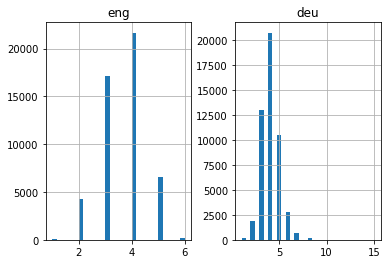

In [ ]:
# empty lists
eng_l = []
deu_l = []

# populate the lists with sentence lengths
for i in deu_eng[:,0]:
      eng_l.append(len(i.split()))

for i in deu_eng[:,1]:
      deu_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'deu':deu_l})

length_df.hist(bins = 30)
plt.show()

## 2.3 Tokenize and encode

Next, vectorize our text data by using Keras’s Tokenizer() class. It will turn our sentences into sequences of integers. We can then pad those sequences with zeros to make all the sequences of the same length.

Note that we will prepare tokenizers for both the German and English sentences:


In [ ]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [ ]:
# prepare english tokenizer
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 6106


In [ ]:
# prepare Deutch tokenizer
deu_tokenizer = tokenization(deu_eng[:, 1])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 8
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

Deutch Vocabulary Size: 10060


The below code block contains a function to prepare the sequences. It will also perform sequence padding to a maximum sentence length as mentioned above.

In [ ]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

## 2.4 Training Model

In [ ]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(deu_eng, test_size=0.2, random_state = 12)

It’s time to encode the sentences. We will encode German sentences as the input sequences and English sentences as the target sequences. This has to be done for both the train and test datasets.

In [ ]:
# prepare training data
trainX = encode_sequences(deu_tokenizer, deu_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(deu_tokenizer, deu_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

We’ll start off by defining our Seq2Seq model architecture:



*   For the encoder, we will use an embedding layer and an LSTM layer.
*   For the decoder, we will use another LSTM layer followed by a dense layer.



In [ ]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

We are using the RMSprop optimizer in this model as it’s usually a good choice when working with recurrent neural networks.

In [ ]:
# model compilation
model = define_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)

2022-08-14 13:56:27.630988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 13:56:27.631902: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
rms = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 512)            5150720   
                                                                 
 lstm (LSTM)                 (None, 512)               2099200   
                                                                 
 repeat_vector (RepeatVector  (None, 8, 512)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 8, 512)            2099200   
                                                                 
 dense (Dense)               (None, 8, 6106)           3132378   
                                                                 
Total params: 12,481,498
Trainable params: 12,481,498
Non-trainable params: 0
____________________________________________

In [ ]:
filename = 'model.h1.24_jan_19'
checkpoint = ModelCheckpoint(filename, monitor='val_loss, val_accuracy', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30


2022-08-14 13:56:33.025856: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-14 13:56:35.003165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:56:35.510898: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_40/output/_23'
2022-08-14 13:56:35.514311: I tensorflow/core/grappler/optimizers/custom_grap

63/63 [==============================] - ETA: 0s - loss: 3.2076

2022-08-14 13:56:54.092429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:56:54.271918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 13:56:54.342480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 23s 247ms/step - loss: 3.2076 - val_loss: 2.7596
Epoch 2/30
63/63 [==============================] - 14s 226ms/step - loss: 2.7141 - val_loss: 2.6740
Epoch 3/30
63/63 [==============================] - 14s 229ms/step - loss: 2.5493 - val_loss: 2.5420
Epoch 4/30
63/63 [==============================] - 15s 233ms/step - loss: 2.3936 - val_loss: 2.3853
Epoch 5/30
63/63 [==============================] - 14s 226ms/step - loss: 2.2692 - val_loss: 2.3101
Epoch 6/30
63/63 [==============================] - 14s 225ms/step - loss: 2.1607 - val_loss: 2.2186
Epoch 7/30
63/63 [==============================] - 14s 221ms/step - loss: 2.0523 - val_loss: 2.1389
Epoch 8/30
63/63 [==============================] - 14s 224ms/step - loss: 1.9512 - val_loss: 2.0498
Epoch 9/30
63/63 [==============================] - 14s 227ms/step - loss: 1.8570 - val_loss: 2.0166
Epoch 10/30
63/63 [==============================] - 14s 227ms/step - loss: 1.7714 - val_loss: 1.9507


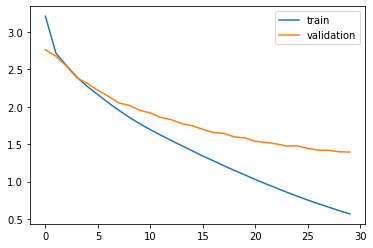

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
# preds = (model.predict(testX.reshape((testX.shape[0],testX.shape[1]))) > 0.5).astype("int32")
#preds = model.predict(testX)
preds = model.predict(testX.reshape((testX.shape[0],testX.shape[1])))

313/313 [==============================] - 5s 17ms/step


In [ ]:
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          # print(word, index, n)
          if index == n:
              return word
      return None

In [ ]:
for word, index in eng_tokenizer.word_index.items():
  print(word)

In [ ]:
import numpy as np
from tqdm import tqdm
preds_text = []
for i in tqdm(preds):
       temp = []
       for j in range(len(i)):
            token_index = np.argmax(i[j])
            t = get_word(token_index, eng_tokenizer)
            if j > 0:
                prev_token_index = np.argmax(i[j-1])
                if (t == get_word(prev_token_index, eng_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          print(t)
                          temp.append(t)

       preds_text.append(' '.join(temp))

  1%|▍                                     | 101/10000 [00:00<00:19, 518.21it/s]

tom
tom
tomll
show
you
it
the
tom
i
tom
i
i
are
they
tom
im
please
tom
it
you
i
tom
tom
i
those
im
tom
thats
i
may
he
tom
is
its
tom
tom
my
just
tom
who
they
i
im
its
its
you
you
his
this
its
thats
thats
i
tom
i
im
tom
what
who
theyre
i
she
im
hes
i
is
i
tom
tom
close
we
tom
i
i
please
hes
have
control
tom
im
tom
im
we
it
youre
do
why
tom
tom
who
lets
theyll
does
thats
dont
tom
excuse
we
the
tom
tom
i
what
dont
thats
he
tom
can


  2%|▊                                     | 220/10000 [00:00<00:17, 564.43it/s]

tom
you
he
tom
she
this
show
i
i
it
tom
we
we
tom
i
i
tom
yours
tom
everyone
its
when
hell
no
who
tom
do
dont
tom
thats
dont
the
i
hold
did
it
you
tom
i
itll
tom
do
we
tom
i
lets
are
its
tom
i
tom
i
they
wash
this
tom
im
please
tom
i
tom
i
why
my
do
theyll
i
give
tom
god
i
im
thats
tom
keep
keep
he
it
she
this
tom
i
do
thats
i
youre
i
i
we
the
everyone
thats
i
tom
i
im
wait
thats
tom
have
i
how
tom
are
he
he
tom
hes
tom
he
i
did
tom
theyre
it
im
tom
im
drive
do


  3%|█▎                                    | 339/10000 [00:00<00:16, 580.73it/s]

i
tom
how
tom
tom
i
i
she
do
you
no
you
did
just
is
tom
tom
thats
i
i
tom
tell
i
shes
tomll
tom
hes
im
theyre
are
arent
hes
you
you
that
what
she
did
break
it
no
did
are
you
they
i
men
were
i
your
tom
he
toms
i
you
i
where
ill
you
my
tom
we
this
im
i
im
i
its
our
how
it
this
is
this
im
it
you
were
im
tom
i
whos
are
give
tom
i
my
i
let
this
i
tom
he
weve
this
i
how
dont
i
we
have
what
tom
i
call
i
do
ill
tom
tom
they
she
his
tom
who
seriously
i
what
read
i
i


  5%|█▊                                    | 463/10000 [00:00<00:16, 589.05it/s]

wheres
its
i
do
ill
tom
tom
i
i
im
i
we
do
theyre
read
im
he
tom
thanks
i
i
i
you
where
dont
my
may
it
it
it
i
tom
tom
toms
tom
i
everyone
i
i
you
was
nobody
it
tom
whats
do
tom
thats
you
i
do
is
tom
i
tom
i
i
do
no
ill
italy
we
tom
dont
is
the
i
did
whose
do
youre
take
how
tom
im
toms
when
i
you
dont
he
where
tom
i
i
im
is
you
i
is
you
tell
tom
i
he
i
we
we
everyone
tom
this
that
i
i
tom
tom
tom
he
i
what
tom
mary
how
wheres
where
this
get
they
tom
who
its
tom
no


  6%|██▏                                   | 582/10000 [00:01<00:16, 582.91it/s]

everyone
tom
tom
i
lets
theyre
they
i
please
were
i
whats
i
it
i
why
youre
i
are
leave
put
lets
get
i
get
wow
tom
the
i
tom
tom
tom
is
are
she
tom
my
im
tom
hes
i
no
tom
read
tom
tom
tom
its
they
tom
its
i
is
he
do
lets
shut
i
tom
i
get
how
this
keep
let
get
im
thats
i
i
tom
whats
keep
tom
we
i
tom
everybody
we
bring
give
shes
seriously
tom
did
go
she
never
who
this
how
thats
tom
you
do
tom
is
eat
tom
i
he
tom
im
do
tom
dont
tom
does
im
they
ask
theyre
its
i
ill
speak
we
tom
tom
thats
she
am
im
i
im


  7%|██▋                                   | 699/10000 [00:01<00:16, 574.63it/s]

wheres
i
im
did
i
theyre
just
what
tom
tom
i
read
it
didnt
who
keep
tom
i
dont
were
i
i
try
who
youre
tom
i
im
isnt
theres
did
he
were
you
who
im
can
its
read
is
i
lets
they
why
i
were
let
thats
tom
im
i
why
get
i
ill
have
throw
ill
theyre
go
i
youve
did
we
he
do
tom
your
did
tom
keep
ill
its
tom
tom
i
we
i
i
get
have
i
why
i
thats
i
tom
they
tom
you
they
tom
this
the
im
my
we
itll
god
its
tom
youre
tom
stop
she
tom
they
tom
tom
i
tom
im
tom
tom
is
are
i


  8%|███                                   | 818/10000 [00:01<00:15, 583.49it/s]

that
i
tom
were
dont
be
is
he
lets
this
lifes
whats
tom
is
what
try
were
tom
she
tom
tom
tighten
it
tom
tom
do
mary
did
i
tomll
i
tom
keep
its
she
tom
tom
i
are
you
he
ill
thats
im
thats
they
im
its
i
he
im
i
are
i
tom
ill
im
she
why
i
go
they
i
did
i
i
im
im
youre
she
you
tom
i
well
i
dont
is
its
im
i
do
i
tom
have
wheres
ill
were
tom
i
i
someone
how
take
it
its
come
listen
we
nothing
was
why
tom
weve
can
i
dont
i
im
read
im
we
i
dont
you
do
he
come
im
i
the
you
tom


  9%|███▌                                  | 941/10000 [00:01<00:15, 596.71it/s]

it
the
go
ok
i
maybe
tom
i
tom
tom
just
he
where
tom
dont
keep
keep
tom
tom
im
tom
it
are
did
tom
i
tom
whats
i
im
i
wait
im
how
its
may
i
just
may
let
tom
he
he
everyone
do
tom
do
tom
when
im
i
youre
do
read
this
i
i
it
dont
he
tom
you
lets
thats
tom
i
everyone
did
they
whats
we
i
tom
dont
let
is
no
does
whos
i
we
stand
does
he
you
thats
tom
i
i
tom
i
cats
its
it
tom
i
i
tom
who
is
i
this
ill
tom
where
are
did
ill
i
i
mary
youre
im
tom
its
i
the
why
maybe
it
were
i
her
what
thats


 11%|███▉                                 | 1062/10000 [00:01<00:15, 593.12it/s]

were
im
tom
no
i
just
please
tom
tom
my
toms
this
isnt
its
tom
tom
its
tom
try
who
you
tom
no
tom
when
i
tom
i
take
im
tom
i
turn
we
thats
tom
i
i
were
theres
you
tom
is
he
its
ask
my
close
youre
tom
please
the
im
this
what
we
im
you
she
he
be
my
tom
tom
keep
my
be
tom
you
i
tom
im
i
i
i
tom
go
youll
who
i
is
can
its
tom
it
tom
tom
i
its
thats
everybody
i
he
tell
i
come
did
did
well
are
im
im
im
i
you
what
we
i
youre
he
i
youre
tom
she
everyone
thats
tom
keep
ill
please
i
get


 12%|████▎                                | 1182/10000 [00:02<00:14, 591.55it/s]

he
please
thank
tom
youre
we
everyone
tom
im
i
i
are
its
tom
im
you
we
how
see
im
no
ill
how
i
thats
whats
i
tom
tom
we
she
i
they
he
are
i
i
i
dont
he
i
its
did
nobody
thats
ill
im
i
who
i
tom
tom
thats
ill
i
he
tom
im
its
whos
im
go
let
he
i
how
tom
was
please
tom
hows
tom
goodbye
is
why
tom
dont
i
were
i
please
yours
its
i
tom
tom
he
i
he
wheres
tom
where
i
she
i
im
nobody
everyone
i
youre
my
i
wheres
the
i
tom
tom
have
was
youre
just
she
everyone
im
thats
were
tom
tom
this
you
lets
its


 13%|████▊                                | 1303/10000 [00:02<00:14, 586.79it/s]

it
who
is
were
i
tom
tom
im
tell
tom
no
call
ill
tom
tom
theyre
i
its
is
he
close
i
i
be
i
i
are
have
tom
im
i
this
tom
lets
tom
i
i
take
im
could
this
no
nobodys
tom
dont
they
tom
tom
nobodys
do
i
im
is
keep
this
your
is
it
toms
prices
youre
we
what
im
control
we
he
let
its
youre
tom
were
are
it
i
i
im
how
get
it
keep
france
tom
tom
get
choose
were
i
well
dont
you
beat
can
i
she
tom
the
the
thats
please
the
tom
you
were
its
this
that
close
they
how
were
stop
tom
thats
they
what
we
hello
tom


 14%|█████▎                               | 1422/10000 [00:02<00:14, 588.60it/s]

we
i
they
i
they
its
this
he
were
i
dont
turn
tom
im
i
thats
please
i
im
i
youre
this
tom
tom
come
he
you
be
he
summer
let
this
stick
you
tom
hes
it
she
who
tom
do
thats
i
show
tom
im
you
he
wash
i
let
can
i
tom
i
youre
youll
tom
get
its
youre
i
hes
tom
im
i
ill
tom
no
were
how
try
i
they
where
its
tom
it
tom
you
show
wheres
i
are
i
dont
i
please
i
she
i
they
tom
tell
i
tom
i
everyone
this
everyone
thats
the
whos
tom
well
the
i
tom
it
how
did
i
that
they
you
i
i
have
he
he
can
tom
my


 15%|█████▋                               | 1542/10000 [00:02<00:14, 586.73it/s]

tom
did
i
tom
tom
just
ill
where
he
call
please
do
i
we
i
dont
dont
tomll
try
i
my
who
i
she
tom
lets
we
im
he
the
i
we
i
are
are
is
tom
im
fix
do
tom
tom
dont
i
tom
people
tom
tom
keep
wonderful
can
keep
youre
tom
she
is
tom
tom
go
he
can
i
they
this
stay
thats
go
let
im
speak
we
i
heres
tom
its
she
it
do
i
its
im
tom
tom
youre
do
were
we
do
it
it
no
it
well
im
toms
try
he
tom
tom
ill
tom
i
i
im
you
nothing
tom
do
tom
i
we
tom
do
he
thats
she
tom


 17%|██████▏                              | 1660/10000 [00:02<00:14, 585.76it/s]

dont
she
i
i
im
he
you
tom
they
tom
we
you
it
he
we
you
tom
tom
wheres
tom
tom
he
whats
im
let
im
i
hes
is
am
thats
tom
im
you
my
it
you
i
this
were
i
she
read
tom
we
what
lets
i
were
its
can
i
i
tom
why
tom
dont
tom
did
she
i
were
is
i
i
we
were
just
drink
you
that
i
we
dont
i
it
tom
im
i
tom
please
tom
we
do
where
have
i
she
he
come
he
they
i
dont
i
we
what
was
how
please
i
dont
tom
tom
it
im
its
he
im
tom
tom
thanks
you
im
tom
boil
i
no


 18%|██████▌                              | 1782/10000 [00:03<00:13, 589.03it/s]

this
its
tom
dont
who
do
i
i
its
i
do
i
tom
tom
i
tom
i
my
keep
please
take
tom
she
try
i
i
put
i
its
keep
are
why
no
when
tom
i
please
tom
a
it
tom
they
thats
what
she
tom
that
it
wheres
keep
tom
i
thats
nothing
im
i
mary
isnt
tom
its
hows
toms
how
please
tom
do
it
they
tom
you
everything
tom
im
what
youre
ask
is
just
i
ill
you
they
you
thats
i
i
were
get
youre
id
i
lets
can
tom
tom
tom
its
tom
hows
you
the
theyre
its
tom
do
what
show
im
please
listen
tom
youre
tom
tom
im
ill
i
i
im
tom
is
do
i
tom
keep
tom
dont


 19%|███████                              | 1897/10000 [00:03<00:15, 534.12it/s]

i
it
im
please
wait
ill
im
did
tom
drink
its
tom
tom
i
i
the
keep
i
i
tom
it
i
did
we
boil
show
i
i
it
she
what
wheres
tom
is
it
i
tom
we
tom
can
i
is
tom
tom
i
how
when
you
you
who
we
chew
im
tomll
tom
is
it
i
the
try
i
were
please
you
im
i
no
tom
tom
someone
im
it
i
he
tom
eat
it
tom
tom
open
tom
be
i
tom
arent
youre
where
can
you
thats
my
keep
may
may


 20%|███████▍                             | 2017/10000 [00:03<00:14, 562.80it/s]

everyone
thats
im
i
were
we
it
i
he
its
tom
do
thats
did
who
thats
how
she
keep
tom
the
no
be
thats
take
theyre
ill
i
shes
you
something
tom
im
is
she
were
i
he
do
can
look
we
i
let
tom
it
tom
these
they
im
i
i
everyone
it
im
i
tom
he
i
its
tom
theyre
he
i
im
i
im
i
i
the
take
are
are
they
who
i
did
tom
send
tom
please
breathe
i
tom
roll
put
ask
i
tom
keep
were
my
why
were
come
do
its
i
he
show
im
its
i
i
he
is
he
leave
bring
i
you
tom
are
can
were
she
my
thats
dont
tom
tom
we


 21%|███████▉                             | 2137/10000 [00:03<00:14, 557.66it/s]

how
are
i
she
theyre
how
tom
it
the
i
what
ill
dont
just
you
the
we
im
i
say
get
how
when
tell
tom
i
i
turn
tom
whos
please
may
whos
that
they
tom
i
tom
i
lets
why
tom
tom
youre
my
she
why
are
tom
i
i
how
im
theres
stop
let
the
you
they
can
tom
this
let
what
its
do
i
mary
ok
tom
tom
thats
you
tom
tom
im
turn
just
tom
i
tom
youre
you
i
tom
what
they
who
tom
what
she
start
it
i
im
its
tom
do
im
im
tom
do
tom
we
tom
i
theres
he
do
we
isnt
tom
no
stop
tom
dont
tom
tom
tom
have


 23%|████████▎                            | 2257/10000 [00:03<00:13, 577.91it/s]

you
i
do
he
you
i
dont
ill
they
i
i
i
i
leave
they
whose
thats
thanks
replace
he
she
dont
i
do
does
i
was
tom
my
let
youre
i
tom
is
dont
thats
i
who
no
he
tom
do
my
he
i
it
i
tom
who
they
i
they
why
tom
tom
who
it
we
hes
he
tom
did
have
tom
tom
they
were
who
tom
tom
wheres
youre
tom
its
tom
it
thats
tom
it
i
yours
this
tom
youre
hurry
ill
tom
toms
well
thats
do
tom
the
this
i
try
we
tom
tom
tom
hes
i
tom
please
its
i
i
tom
im
do
we
i
are
tom
you
are
ill
tom
tom
open
theyre
is


 24%|████████▊                            | 2383/10000 [00:04<00:12, 603.43it/s]

lets
do
i
someones
tom
tom
i
he
im
youre
i
how
everybody
this
we
i
he
take
do
i
are
come
we
who
are
are
tom
why
can
he
they
just
we
tom
she
i
the
you
tom
im
tom
well
stop
wheres
something
what
tom
i
i
tom
i
get
is
tom
youre
im
i
he
he
have
i
she
are
do
are
tom
im
is
what
mary
is
he
how
who
tom
do
i
this
tom
you
im
is
come
they
can
it
i
i
why
they
i
i
the
are
im
i
im
tom
she
why
i
draw
tom
im
do
why
mary
i
wood
how
she
tom
tom
tom
sleep
tell
i
i
his
you
i
i
i
tom
dont
i
i
turn
she
put


 25%|█████████▎                           | 2509/10000 [00:04<00:12, 612.89it/s]

come
i
may
do
tom
he
are
dont
no
we
im
tom
whats
i
what
let
i
tom
the
youre
thats
tom
i
the
i
i
its
i
i
she
dont
i
tom
call
come
i
the
well
where
he
everything
i
im
welcome
i
i
i
tom
can
tom
i
he
whose
the
tom
i
i
tom
mary
we
are
wheres
tom
let
i
i
i
get
theyre
this
dont
tom
no
was
tom
im
thatd
i
did
tom
tom
tom
tom
i
look
we
thats
i
we
look
i
this
maybe
i
were
i
thank
do
thats
do
youre
im
did
youre
youre
dont
is
im
i
tom
i
dont
its
i
we
tom
its
tom
i
is
my
tom
tom
drop
hes


 26%|█████████▋                           | 2632/10000 [00:04<00:12, 607.14it/s]

im
i
toms
i
can
tom
i
you
im
tom
tom
ill
tom
this
thats
let
i
dont
can
im
im
tom
he
tom
i
it
tom
they
thats
we
tom
tom
you
they
it
take
thanks
thats
i
my
tom
i
today
a
tom
this
dont
is
it
tom
i
toms
this
take
what
dont
hes
her
i
dont
everyone
tom
were
my
hey
i
turn
tom
is
he
tom
tom
i
they
we
i
im
shall
i
tom
my
i
what
i
am
i
tell
we
he
no
theyre
the
tell
show
tom
tom
give
did
tom
tom
it
you
i
wash
how
he
tom
what
what
im
the
happy
tom
no
well
tom
open
it
i
no
i
tom
tom
hold
she
who
are


 28%|██████████▏                          | 2754/10000 [00:04<00:12, 601.86it/s]

how
it
i
i
be
youre
tom
im
is
i
tom
are
are
i
how
the
tom
youre
i
she
its
is
tom
where
come
i
can
may
everyone
tom
can
this
take
we
i
did
how
did
they
tom
how
tom
tom
he
i
do
tom
god
tom
i
thats
put
were
wheres
i
i
whos
im
are
can
i
let
keep
let
be
are
choose
dont
tom
dont
i
he
tom
the
i
i
tom
tom
the
he
i
are
i
i
keep
tom
thats
its
he
get
give
thats
what
im
thats
im
theyre
i
get
breathe
turn
you
the
i
i
i
its
i
i
heres
im
no
the
you
go
tom
youre
tom
im
mary
i
tom
im


 29%|██████████▋                          | 2876/10000 [00:04<00:11, 600.26it/s]

who
youre
we
she
tom
theyre
tom
hes
tom
tom
i
whats
she
close
this
thats
tom
was
tom
i
you
stay
the
were
todays
tom
we
i
do
the
wait
tom
youre
dont
he
are
wheres
i
i
i
you
eat
what
i
tom
my
i
i
is
have
he
tom
im
it
i
im
i
tom
tom
thats
dont
you
may
tom
tom
hes
they
you
arent
tom
i
be
what
im
which
thats
he
he
hes
my
i
im
write
she
tom
i
did
take
she
tom
tom
im
thanks
tom
this
give
ill
my
i
i
hes
dont
i
how
i
i
tom
tom
it
i
i
do
i
my
dont
my
im
i
leave
i
i
youll
i
thats
what


 30%|███████████                          | 3000/10000 [00:05<00:11, 605.46it/s]

we
its
tom
im
dont
is
how
they
i
tom
we
is
is
i
he
we
i
im
her
she
is
start
youre
boil
tom
who
tom
tom
tom
tom
she
did
you
tom
do
you
i
whats
were
i
you
tom
see
im
toms
get
give
will
dont
i
ill
ill
she
how
wait
tom
can
i
tom
its
what
get
tom
who
i
are
hes
tom
im
is
thats
i
thank
please
he
i
whos
its
tom
soccer
this
theres
do
what
do
do
i
im
tom
let
get
thats
lets
can
why
its
dont
dont
we
its
go
i
i
tom
were
stay
im
is
why
do
tom
dont
it
he
please
thanks
i
tom
id
tom
tom
tom
this
isnt


 31%|███████████▌                         | 3122/10000 [00:05<00:11, 602.32it/s]

thats
why
tom
you
keep
what
tom
im
you
i
thats
thats
i
come
i
i
i
the
thats
im
tom
is
tom
what
ill
i
it
how
tom
tom
tom
i
he
i
good
why
how
something
we
tom
we
let
stop
did
seriously
its
dont
tom
i
youre
im
they
tom
leave
tom
she
why
tom
its
tom
i
im
do
youre
i
send
tom
the
tom
im
tom
she
keep
put
i
my
my
itll
that
tom
i
i
tom
tom
tom
we
she
hes
tom
i
i
tom
im
youre
could
tom
tom
tom
does
i
i
im
do
dont
lets
these
hes
tom
did
its
i
ill
im
i
im
everyone
im
ill
i
who
we
youre
were


 32%|████████████                         | 3246/10000 [00:05<00:11, 608.49it/s]

today
tom
turn
youre
call
the
i
i
we
are
it
youre
ask
why
they
frogs
someone
tom
may
now
ill
im
tom
turn
its
it
open
i
it
she
tom
tell
i
i
they
shall
you
does
they
toms
hes
tom
well
she
tom
im
dont
ill
give
youre
tom
wait
tom
go
tom
im
it
i
turn
he
come
what
tom
he
im
did
you
i
were
im
did
are
i
what
is
eat
i
youre
ill
tell
she
i
im
were
i
was
do
tom
do
i
ask
he
i
youre
tom
thats
im
i
i
i
what
you
his
shes
get
tom
hes
these
i
you
are
i
may
tom
the
itll
have
the
step
tom
it
its
who
they
well
tom


 34%|████████████▍                        | 3370/10000 [00:05<00:10, 611.66it/s]

dont
he
tom
his
i
im
is
im
have
hes
tom
ill
show
who
put
do
do
tom
keep
tom
she
is
i
tom
i
what
i
it
he
tom
theyre
its
i
it
i
arent
i
have
i
is
we
nobody
tom
im
i
tom
are
that
i
come
i
were
did
tom
i
everyone
this
i
we
tom
we
he
tom
i
is
why
this
who
id
i
the
did
i
tom
do
can
keep
give
who
lets
how
well
he
im
tom
it
tom
toms
whats
be
thats
we
she
is
im
she
tom
tom
he
was
i
im
you
is
tom
he
tom
do
ill
im
you
this
see
i
dont
dont
we
i
we
are
i
lets
whose
please
tom


 35%|████████████▉                        | 3493/10000 [00:05<00:10, 604.16it/s]

thank
dont
dont
i
theyre
what
you
tom
im
have
its
tom
tom
arent
i
stop
i
im
i
is
we
youll
talk
hes
they
tom
he
tom
read
i
youre
ill
tom
who
they
i
are
tom
i
i
vote
dont
dont
is
thats
do
he
wheres
it
you
tom
it
its
nobody
tom
dont
its
this
wait
i
i
youre
this
im
i
do
everyone
its
i
i
why
thats
tom
is
ill
tom
they
you
try
they
how
the
i
youre
its
were
youre
follow
i
i
im
i
why
catch
it
turn
we
here
im
did
tom
i
they
tom
do
i
i
what
tom
tom
we
why
it
she
my
they
close
my
is
ill
try
i
dont
my


 36%|█████████████▍                       | 3616/10000 [00:06<00:10, 608.49it/s]

where
why
tom
tom
is
how
i
get
the
she
what
the
have
tom
tom
hes
theyre
tom
are
he
tom
what
you
tom
tom
theyre
i
tell
thats
i
tom
dont
are
what
a
im
are
tell
tom
you
tom
tom
lets
theyre
i
tom
thats
i
have
we
i
tom
is
tom
its
my
i
you
please
i
could
tom
i
its
dont
tom
is
i
it
i
thank
we
get
tom
you
they
they
i
tom
hes
who
it
wait
tom
tom
im
i
your
we
thats
tom
give
what
can
are
i
i
thats
lie
are
no
we
please
tom
well
its
there
tom
well
im
tom
keep
were
it
dont
tom
you
its
tom
tom
is
does
tom


 37%|█████████████▊                       | 3738/10000 [00:06<00:10, 602.68it/s]

i
how
go
dont
have
i
does
leave
go
how
thats
tom
im
i
please
im
get
they
did
are
how
its
tom
dont
tom
thats
the
its
they
we
i
ill
tom
i
youre
tom
i
when
let
i
is
i
lets
youll
he
they
were
no
i
i
im
i
tom
is
you
tom
did
he
it
i
i
you
tom
im
go
its
that
i
i
its
lets
tom
its
i
we
the
im
its
dont
im
we
hell
tell
im
tom
this
come
the
i
take
i
im
thats
we
im
stop
do
tom
this
ill
im
thats
whats
he
im
can
i
i
you
tom
come
tom
i
tom
dont
tom
what
keep
im
i
why
it


 39%|██████████████▎                      | 3862/10000 [00:06<00:10, 609.08it/s]

do
tom
it
my
im
tom
tom
tom
tom
did
ill
its
i
tom
tom
tom
he
thats
i
tom
you
tom
we
lets
im
when
did
tom
tom
may
its
he
theres
its
tom
do
tom
you
why
i
i
he
you
my
he
its
i
he
tom
here
this
he
whats
tom
im
thats
its
thats
we
tom
your
are
ill
tom
tom
tom
were
well
do
ill
hes
its
thats
they
tom
when
thats
come
i
i
what
tom
thats
turn
give
tom
my
you
dont
were
tom
it
do
itll
i
tom
get
whose
he
tom
i
i
hes
does
i
may
who
i
you
arent
dont
we
tom
thats
im
lets
hes
tom
what
she
tom
my
drop
are
who
its


 40%|██████████████▋                      | 3984/10000 [00:06<00:09, 601.89it/s]

tom
what
do
tom
its
are
im
i
theyre
dont
tom
give
tom
she
i
what
i
please
youre
i
i
he
its
i
tom
my
tom
which
i
did
i
what
everyone
tom
im
this
i
he
tom
get
put
keep
im
i
i
this
keep
i
the
get
my
they
i
get
how
stop
i
youre
how
i
i
i
tom
i
my
did
tom
thats
he
isnt
my
are
theyre
tom
i
i
he
thatll
youre
tom
wasnt
that
tom
she
im
thats
he
shes
its
that
tom
they
hurry
tom
hey
it
who
tom
i
are
you
take
dont
tom
im
hes
let
tom
today
is
im
my
the
i
i
dont
i
i
i
tom
i
i
you
youre


 41%|███████████████▏                     | 4106/10000 [00:06<00:09, 597.47it/s]

how
ill
thats
rabbits
i
tom
did
im
please
come
my
he
do
nothing
what
im
im
tom
you
do
tom
i
these
come
open
we
im
my
stop
tom
tom
i
be
were
they
theyre
tom
it
tom
im
i
tom
tom
i
is
its
dont
do
what
let
what
it
im
its
i
did
you
i
im
lets
why
i
i
tom
i
i
hold
thats
were
when
are
ill
i
tom
can
she
let
wait
tell
the
are
tom
they
tom
im
i
im
is
were
didnt
thanks
that
stop
here
it
it
i
tom
are
where
you
you
the
tom
i
tom
what
are
i
tom
what
we
tom
tom
stop
did
he
he
the
wheres
tom
tom


 42%|███████████████▋                     | 4229/10000 [00:07<00:09, 602.00it/s]

are
leave
your
maybe
we
she
i
i
im
i
tom
shes
look
wash
tom
whos
he
i
come
i
tom
toms
please
what
you
i
im
you
now
no
are
wait
im
they
tom
here
keep
were
just
i
we
who
im
do
its
she
go
i
what
i
the
we
how
where
i
i
tom
everyone
he
they
she
tom
give
i
i
a
lets
tom
its
drop
im
do
dont
i
i
goodbye
were
the
why
you
he
i
is
we
i
tom
he
he
be
keep
i
is
do
im
show
thats
watch
were
tom
you
you
tom
hes
hows
whats
see
dont
should
is
tom
dont
my
i
is
when
i
its
it
i
im
they
i
tom


 44%|████████████████                     | 4354/10000 [00:07<00:09, 611.58it/s]

im
did
go
you
are
i
tom
hes
did
ask
can
come
tom
thanks
you
she
lets
tom
tom
get
did
it
i
it
this
id
stop
tom
can
the
tom
are
did
tom
i
we
tom
were
tom
he
no
i
thats
take
they
i
can
we
i
im
i
i
try
why
i
we
tom
my
you
tom
youre
tom
go
i
i
she
i
beat
tom
i
i
i
tom
i
i
i
may
tom
did
tell
she
i
tom
im
my
its
im
tom
wheres
were
i
i
who
tom
i
tom
tom
give
she
i
im
are
i
i
what
i
its
its
have
i
dont
can
tom
are
im
i
are
my
i
you
do
you
i
we
tom
he


 45%|████████████████▌                    | 4479/10000 [00:07<00:08, 615.40it/s]

tom
i
tom
you
he
how
theyre
toms
you
tom
its
this
what
come
do
how
where
my
give
you
i
well
youre
i
i
he
are
ill
i
lets
you
were
let
calm
can
tom
im
hes
i
i
i
you
come
isnt
i
i
i
do
this
i
were
when
maybe
were
he
i
i
i
does
tom
its
i
youre
i
no
who
did
come
tom
we
you
the
i
the
tom
tom
give
tom
can
i
does
i
tom
send
im
come
we
dont
he
get
are
im
a
i
it
you
tom
tom
were
im
i
someone
he
is
im
come
toms
were
are
you
im
were
you
write
they
i
i
im
tom
tom
i
i
i
please
when
put
we


 46%|█████████████████                    | 4604/10000 [00:07<00:08, 611.27it/s]

do
when
where
kids
give
my
tom
we
give
i
i
i
answer
i
i
i
thats
you
i
its
tom
tom
tom
you
dont
were
it
release
keep
get
tom
youre
i
let
youre
im
theres
my
im
i
keep
lets
i
what
dont
was
shes
i
youre
i
a
tom
thats
do
tom
she
i
love
shes
he
it
we
were
tom
tom
i
theyre
i
i
dont
i
did
bring
its
tom
tom
where
let
im
do
she
do
im
tom
tom
the
im
it
are
look
youre
i
it
she
they
i
who
were
tom
he
i
dont
she
give
i
i
lets
i
theyre
i
he
mary
everyone
tom
tom
tom
was
what
tom
tom
he
we
tom
i


 47%|█████████████████▍                   | 4728/10000 [00:07<00:08, 608.65it/s]

no
tom
youre
i
is
i
it
no
its
its
tom
tom
we
well
i
he
tom
did
hes
i
is
youre
you
it
youre
i
tom
i
tom
tom
were
eat
tom
theyre
id
is
theyre
we
tom
they
my
please
tom
its
you
we
did
i
arent
we
tom
whats
i
go
did
arent
i
give
is
i
tom
i
tom
i
she
youre
she
im
this
does
we
i
the
tom
is
were
they
i
lets
i
that
im
i
it
i
they
he
tom
i
this
its
its
are
its
youre
ill
she
i
my
i
tom
do
you
tom
i
tom
the
im
shes
its
hows
why
i
lets
your
is
is
im
its
i
im
we
im
wait


 49%|█████████████████▉                   | 4852/10000 [00:08<00:08, 611.12it/s]

where
theyre
try
we
which
tell
thats
im
stop
i
please
its
we
it
hes
im
can
im
ill
you
i
please
he
i
this
im
its
tom
i
my
that
my
the
tom
shut
forget
she
explain
are
whos
tom
tom
come
i
he
there
she
it
you
fix
i
it
dont
i
he
i
thats
breathe
i
tom
i
dont
tom
the
tom
it
he
do
im
tom
tom
a
were
theyre
tom
stop
can
tom
im
shut
tom
open
go
who
tom
i
i
hi
dont
get
give
give
tom
tom
tom
what
im
i
can
you
no
tom
i
do
hes
please
i
do
i
tom
tom
youre
we
thats
tom
we
im
please
tom
whats
tom
its
nothing
thanks


 50%|██████████████████▍                  | 4977/10000 [00:08<00:08, 609.30it/s]

i
tom
dont
tom
thats
thats
is
please
thats
do
tom
i
let
have
i
it
i
tom
tom
i
i
its
were
tom
i
he
lets
what
its
its
this
your
thats
who
i
i
its
i
turn
he
it
tom
we
i
tom
read
she
whats
this
tom
he
they
were
theyre
they
i
send
she
i
i
i
its
its
stop
everyone
theyre
i
tom
i
the
where
it
she
tom
youre
im
tom
hes
tom
have
tom
he
they
tom
tom
im
you
i
eat
he
tom
tom
tom
come
shall
you
he
tom
men
give
youre
do
he
i
tom
its
i
i
we
did
were
i
toms
dont
i
we
the
i
ill
i
its
i
lets
was
they
i


 51%|██████████████████▊                  | 5099/10000 [00:08<00:08, 604.30it/s]

i
lets
who
he
it
just
that
she
take
come
your
the
why
replace
dont
for
ill
were
he
this
i
ill
what
she
are
tom
his
tom
i
he
it
tom
have
which
i
give
take
im
im
it
are
tom
are
i
im
im
im
tom
lets
hes
wheres
do
he
just
tom
i
were
i
im
im
what
turn
its
i
thats
i
its
tom
whats
tom
put
i
do
i
i
tom
please
you
is
im
i
please
fix
she
im
tom
heres
i
i
the
dont
what
we
do
tom
were
do
i
youre
you
am
im
tom
read
mary
tom
come
write
the
can
yours
i
i
welcome
hey
i
its
tom
where
i
youre


 52%|███████████████████▎                 | 5221/10000 [00:08<00:08, 595.31it/s]

may
do
whats
dogs
i
tom
i
look
youre
kill
did
im
i
may
i
i
we
does
turn
im
i
i
the
that
i
hows
hes
he
mary
whos
mary
keep
i
do
were
i
she
tom
tom
he
please
i
what
youre
you
its
i
tom
give
tom
hes
i
have
tom
are
shes
tom
were
toms
the
tom
i
tom
he
im
its
tom
its
my
how
say
do
you
thanks
tom
tom
tom
drive
did
which
is
they
it
the
let
everyone
is
toms
people
he
tom
tom
im
im
you
she
its
just
do
arent
were
tom
drink
a
she
was
you
everyone
i
answer
were
he
we
can
i
i
tom
my
im
bugs
thats
they
just
they
tom


 53%|███████████████████▊                 | 5343/10000 [00:09<00:07, 600.75it/s]

we
i
tom
i
isnt
they
i
i
is
its
have
thats
i
isnt
you
itll
ill
she
ill
they
tom
tom
give
tom
come
tom
that
its
dreams
they
didnt
im
im
get
im
may
thats
he
i
this
he
he
i
tom
you
who
they
im
im
thats
you
im
tom
tom
i
speak
come
can
do
im
dogs
i
i
he
tom
ill
i
i
how
youre
take
were
i
he
tom
you
i
tom
he
you
i
im
is
i
try
i
im
whats
wheres
tom
tom
i
im
i
i
do
my
they
im
i
i
spiders
tom
tom
just
i
forget
im
ill
it
i
tom
my
tom
you
tom
i
i
i
no
you
tom
tom
tom
do
tom
put
youre


 55%|████████████████████▏                | 5467/10000 [00:09<00:07, 608.98it/s]

it
has
youre
nothing
i
tom
tom
i
i
i
im
did
i
did
get
im
i
may
tom
we
why
i
tom
im
just
youre
theyre
you
are
did
ill
i
i
i
dont
i
wheres
are
i
toms
do
why
hes
cut
were
we
he
tom
hes
tom
wait
can
you
i
im
please
tom
tom
tom
he
its
he
i
tom
well
i
tom
i
stop
this
tom
she
we
i
im
tom
tom
tom
tom
ill
when
tom
tom
how
have
did
i
who
i
i
were
i
i
youre
its
tom
i
tom
im
its
tom
she
id
you
dont
thats
tom
you
it
do
tom
tom
eat
please
i
she
he
i
tom
tom
do
do
im
tell
come
he
youre
she
tom


 56%|████████████████████▋                | 5592/10000 [00:09<00:07, 615.57it/s]

im
thats
keep
she
no
we
i
how
my
im
he
anyone
i
tom
is
tom
im
i
tom
i
he
be
its
tom
i
im
im
i
let
tom
i
read
i
i
go
tom
a
you
tom
tom
im
tom
please
this
he
my
i
are
he
tom
are
tom
i
i
are
i
who
dont
its
tom
you
thats
its
what
i
tom
i
this
please
i
were
its
lets
im
i
tom
thats
lets
i
is
it
are
this
were
youre
the
beat
tom
i
tom
write
i
i
well
its
tom
i
tom
tom
was
thats
tom
i
is
its
i
did
he
where
im
i
i
you
it
who
i
tom
he
dont
read
is
it
i
i
tom
lets
this
im
she
mary


 57%|█████████████████████▏               | 5715/10000 [00:09<00:07, 603.36it/s]

youre
can
what
tom
tom
i
i
i
tom
im
tom
isnt
he
were
have
i
i
get
tom
its
whats
tom
im
were
breathe
the
this
please
tom
he
did
do
im
its
lets
my
whose
i
tom
mary
tom
hand
i
im
were
tom
give
is
thats
theyre
i
im
i
ill
dont
i
shes
get
tom
tom
read
i
take
i
i
i
i
you
i
do
do
our
youre
help
who
tom
can
youre
i
were
hows
dont
its
i
tom
im
is
come
your
where
you
is
they
wait
did
here
im
youre
im
you
do
why
its
we
you
tom
he
tom
lets
everything
dont
we
its
tom
tom
i
are
tom
i
no
tom
tom
tom
how
who


 58%|█████████████████████▌               | 5838/10000 [00:09<00:06, 608.77it/s]

youre
its
they
tom
tom
i
tom
tom
no
tom
im
everyone
you
thats
when
is
tom
he
youll
call
tom
dont
he
im
tom
get
it
you
theyre
is
i
do
try
tom
they
i
who
im
hit
she
i
dont
this
come
the
i
its
tom
it
its
im
this
im
tom
he
dont
i
i
he
i
ill
no
where
that
who
everyone
may
tom
did
he
tell
tom
the
its
youre
that
i
you
im
he
people
i
ill
tom
i
this
its
whats
tom
youre
is
is
mary
i
how
be
you
tom
who
it
i
it
tom
i
i
i
did
that
i
she
he
youre
i
tom
youre
i
its
read
i
the
have
mary
is
is
what
do
tom
you
tom


 60%|██████████████████████               | 5965/10000 [00:10<00:06, 618.28it/s]

they
its
it
im
they
he
is
tom
he
im
i
hes
tom
thats
im
everyone
i
im
i
we
that
whatll
i
your
i
tom
hows
we
tom
i
i
the
tom
i
how
youre
i
tom
let
tom
tom
i
my
tom
theyre
how
i
i
tom
we
do
theyre
she
he
i
im
tom
do
he
is
tom
i
he
is
i
hes
who
tom
could
tom
tom
i
i
take
dont
i
tom
i
tom
can
im
he
tom
you
where
please
theyre
tom
everyone
i
he
i
is
that
i
im
tom
tom
was
stop
the
that
it
do
i
dont
give
i
hes
we
show
tom
youre
were
tom
tom
whats
please
i
dinner
tom
tom
keep
im
nobody
you
tom


 61%|██████████████████████▌              | 6090/10000 [00:10<00:06, 619.30it/s]

thats
can
the
prepare
i
theyre
i
tom
can
my
it
tom
this
i
i
you
yours
tom
how
you
dont
how
tom
how
tom
i
we
was
i
i
who
never
i
this
everyones
hes
how
here
tom
get
tom
wheres
do
everyone
i
they
did
she
is
its
tom
i
try
tom
tom
is
be
can
we
tom
i
tom
i
tom
where
i
youre
it
he
watch
whats
they
is
lets
i
is
were
ok
im
when
leave
hes
what
keep
be
may
tom
is
i
you
he
id
tom
tom
will
nobody
well
i
isnt
why
can
whats
he
i
how
why
who
did
hug
thats
tom
tom
im
hes
i
cut
he
he
is
tom
tom
i
can
get
did
open
tom


 62%|██████████████████████▉              | 6214/10000 [00:10<00:06, 611.02it/s]

keep
are
we
tom
his
tom
why
tom
tom
im
what
is
why
dont
tom
tom
dont
keep
the
tom
i
everyone
tom
i
i
tom
tom
who
you
i
my
i
well
theyre
wheres
im
i
i
tom
thank
im
tom
tom
do
tom
you
he
this
he
were
i
i
my
the
please
break
tell
help
you
please
tom
it
do
did
what
i
who
i
im
when
how
no
it
its
we
i
i
ive
have
the
please
tom
i
tom
i
tom
im
thanks
my
we
youre
they
im
tom
i
i
its
tom
you
dont
life
tom
tom
i
tom
sit
im
she
they
i
were
i
tom
are
whats
run
i
it
i
i
watch
dont
he
maybe
tom
i


 64%|███████████████████████▋             | 6402/10000 [00:10<00:05, 615.72it/s]

do
ill
i
i
im
well
how
whats
that
he
you
you
we
im
tom
tom
im
try
did
i
we
use
tom
im
why
tom
stop
we
youre
theyre
answer
theyre
i
thats
give
is
whos
she
dont
were
youre
i
im
the
how
tom
i
may
is
give
theyre
its
i
is
tom
we
did
this
im
we
tom
thats
thats
i
is
tom
tom
tom
we
you
is
did
thats
i
tom
mary
get
this
we
are
why
im
tom
tom
im
dont
well
dont
im
im
im
please
tom
our
dont
you
everythings
tom
just
i
shes
youre
i
i
i
tokyo
its
tom
sit
tom
im
im
what
i
she
this
tom
tom
i
why
everything
this
dont
im


 65%|███████████████████████▉             | 6464/10000 [00:10<00:05, 603.96it/s]

youre
how
tom
they
is
tom
im
i
is
how
you
im
add
thats
bring
were
i
tom
dont
take
i
ask
thats
tom
is
im
we
hes
this
i
there
i
i
you
it
im
i
i
tom
im
i
thats
im
im
tom
thats
give
you
my
he
no
youre
he
they
thanks
are
youre
tom
well
you
throw
isnt
i
i
i
what
im
did
thats
tom
i
dont
were
thats
tom
i
i
im
shes
im
come
no
he
i
they
that
please
he
i
i
everyone
he
help
were
drink
wait
keep
tom
i
please
you
i
hes
why
you
stick
where
are
why
tom
i
it
tom
tom
tom
she
im
do
tom


 66%|████████████████████████▎            | 6585/10000 [00:11<00:05, 593.60it/s]

they
its
i
they
have
get
seriously
thats
tom
we
you
just
keep
she
you
its
i
take
tom
they
ill
thats
are
i
i
tom
youll
it
i
tom
tom
it
my
that
that
tom
youre
tom
i
tom
im
can
tom
were
what
im
tom
everything
can
tom
hes
im
i
we
wheres
hes
my
i
i
i
i
what
im
i
youre
hes
is
im
are
no
it
the
we
i
tom
tom
you
he
this
ill
i
something
it
id
you
did
stay
tom
i
tom
i
hes
i
im
he
what
we
tom
she
dogs
thats
tom
tom
tom
tom
they
i
i
tom
whats
did
he
may
this
read
the
tom
were
put
where
they
its
i


 67%|████████████████████████▊            | 6706/10000 [00:11<00:05, 596.80it/s]

go
tom
its
lets
dont
im
were
i
put
it
you
i
theyre
its
i
come
i
people
its
i
how
the
tom
im
tom
when
tom
i
tom
is
i
tom
do
i
i
get
the
can
welcome
i
he
did
i
are
im
this
tom
please
i
i
that
i
im
youre
we
look
we
tom
i
say
tom
tom
you
i
im
ill
i
well
i
shes
have
please
dont
how
i
shes
we
tom
tom
the
they
i
i
tom
tom
i
i
tom
who
tom
learn
is
she
i
tom
tom
this
hello
i
can
youre
tom
i
i
tom
come
get
we
ill
lets
tom
im
tom
im
you
he
see
this
hes
im
why
theyre


 69%|█████████████████████████▍           | 6890/10000 [00:11<00:05, 601.54it/s]

thats
tom
tom
you
tom
tom
that
wheres
this
whats
tom
they
tom
tom
you
im
im
i
im
were
i
i
theyre
i
i
i
i
was
dont
we
did
i
its
i
tom
tom
there
tom
i
tom
i
it
are
tom
did
dont
please
i
i
could
he
the
will
whats
i
thats
i
its
theres
im
is
my
tom
thats
i
tom
tom
it
hes
she
it
is
tom
tomll
keep
this
you
put
tom
i
youre
who
a
theyre
the
you
i
tom
i
tom
they
what
everyone
he
its
can
do
i
are
tom
a
its
she
the
they
i
is
i
be
try
tom
thats
tom
tom
you
may
were
im
he
he
youre
tom
merry
this


 70%|█████████████████████████▋           | 6951/10000 [00:11<00:05, 598.97it/s]

its
he
ill
we
didnt
tom
let
the
dont
tom
i
why
were
i
its
we
tom
tom
youre
i
who
i
tom
the
i
it
i
wait
are
i
he
tom
wheres
im
who
i
how
you
he
its
are
ill
i
i
i
did
it
i
did
the
thanks
i
i
thats
tom
i
dont
tom
im
were
tom
it
i
where
that
dont
they
its
tom
my
i
it
dont
tom
i
dont
its
go
i
thats
tom
were
it
may
i
my
im
watch
thats
he
i
beat
tom
did
its
my
tom
i
its
i
answer
he
the
they
what
its
you
the
tom
were
be
i
tom
i
he
i
my
what
ill
tom


 71%|██████████████████████████▏          | 7073/10000 [00:11<00:04, 599.20it/s]

she
is
do
youre
were
tom
is
it
i
i
did
youre
it
he
did
breathe
he
write
its
i
thats
are
i
let
theyre
you
do
they
tom
ill
thats
you
that
where
watch
i
where
do
please
tom
dont
tom
tom
i
thats
i
he
just
are
are
tom
tom
is
i
please
tom
he
toms
i
it
you
i
i
im
were
i
lets
you
the
ask
tom
tom
who
tom
theyre
tom
i
im
tom
this
a
im
i
tom
i
was
wait
yours
hes
theyre
youll
this
i
tom
it
tom
i
that
im
tom
we
lets
i
i
no
do
get
im
this
you
i
tom
it
please
i
i
no
ill
i
prices
are
tom
is


 73%|██████████████████████████▊          | 7255/10000 [00:12<00:04, 600.52it/s]

yours
tom
where
are
she
my
tom
tom
dont
he
the
i
i
tom
whose
tom
who
that
what
you
the
they
im
where
tom
its
go
yours
its
the
they
you
tom
i
does
i
tom
how
he
youll
boil
may
have
a
is
tom
you
i
i
its
tom
im
the
we
he
tom
please
toms
what
thats
were
stop
tom
hes
it
tom
please
were
come
tom
tom
go
take
tom
hes
is
i
it
he
were
theyre
you
who
when
thats
tom
stop
tom
we
who
tom
i
is
he
i
keep
im
can
tom
tom
tom
tom
quiet
give
who
tom
tom
i
it
i
its
tom
i
tom
you
is
i
got
were
i
you
your
tom
theyre
hey


 74%|███████████████████████████▎         | 7378/10000 [00:12<00:04, 599.81it/s]

i
watch
i
is
are
youre
what
those
what
tom
dont
this
tom
you
stick
get
im
dont
tom
its
i
it
i
is
im
watch
keep
its
i
it
tom
tom
i
im
youre
i
dont
have
i
dont
i
i
where
i
is
he
ill
tom
were
tom
tom
ill
i
i
tom
i
what
im
did
come
im
watch
i
the
i
hes
it
im
do
tom
tom
dont
theyll
is
are
no
which
got
tom
we
youre
i
why
here
the
how
tom
id
we
do
let
give
tom
tom
thats
i
the
come
theyre
is
send
i
she
are
people
you
tom
its
its
thatll
they
youre
tom
i
arent
ill
i
do
ill
i
its
please
tom
i


 75%|███████████████████████████▊         | 7501/10000 [00:12<00:04, 601.56it/s]

lets
be
please
keep
your
wheres
are
it
tom
tom
we
i
i
are
they
i
is
dont
you
im
we
how
tom
wash
are
tom
does
i
please
dont
can
i
theyre
tom
someones
im
thats
i
i
im
she
it
im
he
stop
can
did
im
dont
we
i
tom
ill
go
its
i
i
today
come
see
im
do
keep
wholl
tom
she
you
are
she
i
lets
tom
man
i
thats
write
i
tom
were
i
he
are
youre
my
she
the
come
do
ill
dont
i
everyone
i
we
tom
tom
he
tom
i
he
did
they
he
i
be
its
thats
are
youre
i
how
tom
is
tom
i
im
open
here
its
look
theyre
i
i
were
it
i
i
tom
may


 76%|████████████████████████████▏        | 7626/10000 [00:12<00:03, 611.54it/s]

im
do
hes
thats
you
is
i
those
thats
dont
stop
you
this
she
tom
everyones
tom
heres
i
i
we
i
i
is
i
this
can
tom
are
welcome
do
do
i
your
they
i
are
im
wheres
do
what
my
the
turn
be
im
i
they
i
do
ill
i
can
send
tom
come
he
im
i
i
that
welcome
youll
you
im
i
tom
i
i
i
i
try
i
wheres
tom
go
i
i
they
i
i
lets
tom
theyre
tom
tom
forget
dont
tom
tom
tom
what
he
do
may
i
im
tom
i
they
he
i
that
is
please
i
did
i
he
i
tom
tom
did
i
what
hes
i
have
i
youre
i
i
tom
tom
i
he
did


 78%|████████████████████████████▋        | 7754/10000 [00:12<00:03, 617.30it/s]

everything
thats
he
thats
i
do
i
i
my
why
i
they
when
i
the
i
i
you
give
they
stand
i
get
how
throw
mary
i
im
tom
tom
tom
tom
have
tom
tom
they
tom
tom
hes
thats
the
what
i
did
we
i
i
it
youre
youre
dont
thanks
start
she
tom
were
i
im
i
i
were
hes
i
show
my
the
a
i
she
how
i
tom
its
youre
is
ill
he
when
tom
well
were
its
thats
ill
are
tom
youre
whos
that
tom
i
i
i
heres
who
youre
come
i
i
i
this
i
i
lets
i
tom
you
keep
tom
shes
i
tom
im
it
tom
he
tom
im
dont
were
im
give
im
i
tom


 79%|█████████████████████████████▏       | 7878/10000 [00:13<00:03, 609.23it/s]

this
its
the
theyre
how
ill
send
i
tom
hes
a
it
do
tom
tom
are
her
i
were
she
are
they
i
my
im
thats
please
tom
the
youre
i
tom
close
theyre
this
im
when
well
thats
wheres
i
how
were
keep
i
its
please
bring
tom
we
he
its
tom
grab
he
we
im
i
tom
tom
they
i
whats
you
its
are
dont
they
i
put
its
may
tom
im
we
close
i
tom
you
is
i
did
can
i
i
we
tom
he
go
we
ill
i
you
i
shall
i
tom
put
the
answer
im
is
tom
tom
tom
tom
ill
were
it
tom
take
are
i
the
tom
do
why
i
i
tom
tom
i
never
a


 80%|█████████████████████████████▌       | 8000/10000 [00:13<00:03, 604.10it/s]

tom
we
i
how
i
she
ill
my
im
youre
who
you
tom
i
im
may
tom
the
thank
how
tom
get
our
tom
tom
this
youre
were
tom
i
how
what
how
i
whos
i
keep
you
i
it
thats
thats
thats
tom
we
are
im
we
i
i
i
i
maybe
im
may
tom
tom
here
i
i
im
i
mary
tom
tom
stop
they
they
he
i
he
whats
are
tom
i
how
is
we
i
i
tom
that
i
is
the
hang
were
theyre
tom
im
they
no
tom
they
give
let
who
tom
tom
here
which
i
i
do
what
im
tom
you
do
what
tom
give
that
how
its
im
is
tom
we
can
tom
he


 81%|██████████████████████████████       | 8124/10000 [00:13<00:03, 608.22it/s]

is
does
i
i
i
i
i
whatll
tom
get
can
tom
tom
i
they
tom
lets
dont
is
do
is
i
im
ill
i
they
stop
please
can
they
how
tom
i
they
whats
tom
youre
your
my
i
im
i
he
this
do
i
what
tom
we
i
how
tom
that
the
step
theyre
theres
it
wheres
come
tom
tom
just
he
i
i
i
let
tom
he
she
can
what
im
read
he
ill
oh
i
we
i
ill
youre
thats
i
the
its
are
youre
tom
i
im
toms
dublin
were
i
we
i
i
are
are
im
i
the
im
youre
they
tom
is
they
wheres
im
hows
tom
can
youre
why
tom
were
tom
i
they
can
we
tom
theyre


 82%|██████████████████████████████▌      | 8249/10000 [00:13<00:02, 613.00it/s]

tom
im
may
i
im
this
its
can
a
shall
it
let
tom
i
can
you
tom
is
im
i
i
she
hes
tom
he
youre
im
i
did
how
she
ill
wait
she
i
how
the
tom
he
im
they
tom
i
ill
tom
didnt
thats
she
i
he
were
tom
hes
tom
tom
tom
she
im
tom
tom
i
here
put
thats
tom
tom
ill
its
you
im
we
you
are
i
this
he
whats
watch
dont
please
i
she
tom
i
tom
life
i
tom
tom
youre
he
tom
are
wheres
go
is
were
were
its
whats
i
he
i
tom
im
i
time
youre
tom
tom
they
im
let
tom
this
i
is
tom
tom
are
the
i
just
i
whose
ok
tom
did
ill


 84%|██████████████████████████████▉      | 8374/10000 [00:13<00:02, 612.51it/s]

youre
the
i
ill
keep
its
i
ill
my
i
get
youre
the
tom
i
i
the
im
wheres
you
toms
is
call
tom
tell
youre
thats
please
i
she
how
tom
i
tom
im
he
i
i
im
thats
did
keep
im
i
it
i
dont
its
she
speak
i
im
im
i
who
were
tom
i
is
your
my
tom
tom
the
i
its
i
ill
here
i
i
dont
try
come
i
i
ask
i
please
thats
she
stop
tom
is
you
did
im
i
tom
dont
i
tom
tom
the
tom
she
i
im
we
were
welcome
ill
tom
just
its
today
whose
how
i
a
hold
do
i
you
what
why
dogs
wheres
this
youre
why
im
hold
who


 85%|███████████████████████████████▍     | 8498/10000 [00:14<00:02, 611.28it/s]

ill
turn
we
i
i
please
my
let
thanks
the
i
i
tom
my
tom
we
im
its
itll
youre
ill
i
tom
are
whats
just
i
im
tom
i
tom
i
take
that
i
you
thats
i
what
i
it
tom
how
im
heres
how
i
i
its
im
are
tom
theres
he
why
wheres
thats
tom
when
ask
do
tom
tom
tom
everyone
i
that
we
are
is
what
dont
the
does
is
i
youll
i
what
dont
tom
who
we
tom
that
i
please
it
tom
im
whos
we
come
it
i
i
the
it
are
she
i
it
were
the
tom
my
ill
hes
i
tom
i
i
tom
tom
did
they
who
i
dont
break
i
i
do
thats


 86%|███████████████████████████████▉     | 8623/10000 [00:14<00:02, 614.36it/s]

what
i
tom
tom
they
who
no
thats
tom
she
im
is
thats
i
who
you
thats
did
silk
did
im
i
tom
the
did
life
tom
why
tom
someones
whats
she
i
its
how
youre
i
are
are
tomll
tom
i
i
she
tom
i
im
i
youre
i
i
tom
tom
you
whats
he
it
tom
i
tom
i
we
hang
thats
the
they
was
did
i
we
i
ill
dont
lets
tom
i
i
you
come
tom
thats
tom
he
wheres
we
this
tom
toms
i
try
the
how
im
i
tom
the
well
dont
heres
it
youll
i
whats
look
give
lets
no
is
tom
i
tom
tom
stop
are
come
i
tom
i
it
my
tom
is
you
i


 87%|████████████████████████████████▎    | 8747/10000 [00:14<00:02, 610.44it/s]

my
he
the
i
is
tom
she
youre
tom
tom
it
ill
i
is
how
tom
tom
you
you
she
i
i
thats
walls
do
i
my
i
tom
dont
ill
stop
they
this
the
she
im
do
were
i
its
im
tom
tom
ill
youre
is
im
can
i
tom
how
whos
im
tom
i
are
now
he
i
tom
i
theyre
wheres
give
is
it
tom
id
thats
do
tom
you
tom
dont
i
tighten
please
try
maybe
i
im
im
tom
i
was
who
tom
i
im
i
hes
thats
this
please
let
tom
whats
tom
tom
i
im
i
it
youre
what
im
she
you
tom
tom
the
dont
im
you
where
tom
ill
i
is
tom
is
i
he
do


 89%|████████████████████████████████▊    | 8870/10000 [00:14<00:01, 606.78it/s]

you
tom
we
how
i
ill
please
how
hi
hes
he
youre
keep
he
are
where
tom
now
turn
i
i
youre
i
im
do
he
its
whats
tom
this
do
tom
see
who
i
this
tom
you
we
this
its
get
i
go
my
thats
the
tom
tom
tom
tom
i
cows
thats
let
watch
thank
theyre
is
she
i
i
lets
give
arent
tom
tom
tom
i
do
its
you
i
give
i
leave
tom
thats
tom
tom
tom
i
whats
im
what
tom
they
i
tom
go
what
i
please
did
tom
tom
tom
women
he
weve
tom
tom
no
she
you
did
tom
i
itll
is
tom
my
i
does
i
we
dont
it
i
im
im
tom


 90%|█████████████████████████████████▎   | 8992/10000 [00:15<00:01, 604.22it/s]

i
lets
he
im
thats
shes
i
tom
were
tom
are
you
i
you
wheres
everyones
i
tom
tom
i
please
she
youre
i
tom
i
tom
stop
tom
do
tom
he
she
its
you
whats
i
get
close
is
he
were
she
we
how
tom
were
tom
tom
which
i
come
i
tom
tom
tom
only
is
its
arent
dont
do
i
tom
tom
do
im
where
i
is
im
you
please
shes
im
you
i
tom
its
her
tom
i
wait
you
youre
youre
theres
tom
thats
stop
i
wheres
i
i
why
how
i
go
he
how
tom
he
tom
this
the
dont
why
when
she
tell
they
i
you
keep
im
im
theyre
come
are
she
i


 91%|█████████████████████████████████▋   | 9118/10000 [00:15<00:01, 613.57it/s]

he
is
please
tom
take
go
have
thats
mary
i
thats
i
i
youre
the
are
no
stay
tom
i
let
does
i
im
cant
tom
this
these
i
how
is
i
she
tom
we
youre
i
its
do
i
it
he
ill
she
i
do
are
i
be
who
thats
can
have
im
i
the
theyre
are
theyre
are
thats
theyre
lets
i
i
we
go
thats
tom
he
we
youre
i
your
choose
let
tom
be
dont
dont
how
stay
i
that
i
tom
drink
i
open
how
i
wheres
the
you
tom
do
ill
i
i
im
ill
eat
drink
what
its
they
thanks
tom
our
cant
my
ill
dont
tom
i
i
shes
tom
shes
i
they
tom
is
tom
it
why


 92%|██████████████████████████████████▏  | 9244/10000 [00:15<00:01, 619.07it/s]

come
who
youre
is
youre
i
they
keep
im
whose
i
you
is
it
ill
do
im
its
i
this
i
was
im
lets
youre
can
i
its
tom
tom
this
tom
am
isnt
i
let
theyre
he
i
have
do
you
i
they
give
i
who
i
thats
do
tom
im
be
is
take
take
hes
are
you
he
my
youll
i
tell
she
i
tom
i
open
do
do
its
that
open
these
nobody
tom
my
put
get
tom
you
no
he
can
why
come
tom
dont
this
youre
he
hes
am
i
i
tom
she
id
youll
you
the
no
tom
i
nobody
i
youre
lets
can
tom
im
wait
give
its
wheres
i
i
look
write
lets
we
i
you


 94%|██████████████████████████████████▋  | 9368/10000 [00:15<00:01, 604.39it/s]

do
i
please
how
tom
he
they
may
i
i
i
its
tom
let
are
please
tom
he
tom
many
i
they
tom
ill
he
this
i
this
i
tom
im
the
do
dont
tom
tom
dont
everyone
who
i
tom
i
youre
i
ask
tom
stop
thats
breathe
is
tom
dont
they
please
i
you
the
you
you
its
tom
come
i
well
whats
tom
tom
do
you
this
we
i
you
i
tom
i
i
hes
tom
it
tom
bring
i
im
let
i
tom
its
she
youre
get
cut
who
may
this
she
thats
tom
i
my
im
ill
dont
i
is
were
itll
she
let
tom
im
tom
no
get
tom
how
im
go
i


 95%|███████████████████████████████████  | 9491/10000 [00:15<00:00, 602.28it/s]

tom
youre
take
tom
tom
they
tom
lets
do
i
do
i
he
is
every
i
i
i
she
he
tom
i
ill
hes
never
tom
this
its
go
tom
thats
whats
i
its
dont
have
im
can
im
they
im
whats
we
tom
tom
this
tom
it
tom
ill
tom
keep
i
she
i
tom
welcome
youve
how
the
i
what
i
tom
its
tom
please
shes
im
he
im
the
tom
who
you
i
try
dont
how
his
i
no
is
tom
whats
is
tom
i
i
dont
i
there
i
please
no
im
i
thats
tom
dont
tom
i
dont
whats
can
i
tom
tom
is
see
did
mary
tom
i
the
i
give
i
get
we
lets
im
tom
isnt
this
did
i


 96%|███████████████████████████████████▌ | 9614/10000 [00:16<00:00, 605.46it/s]

she
im
tom
he
we
she
hes
im
it
we
im
no
take
i
you
your
we
was
im
i
i
wheres
youre
i
i
i
hes
i
who
thats
shes
can
i
are
the
she
youre
tom
give
his
i
im
i
can
ill
please
tom
come
im
im
tom
tom
tom
i
she
be
tom
he
im
please
thats
you
theyre
close
he
mary
i
that
tom
can
ask
i
i
he
that
tom
were
tom
tom
this
step
do
i
do
dont
we
did
they
theyre
whats
its
you
i
why
we
were
read
take
tom
stand
it
everyone
its
tom
its
im
tom
are
it
people
can
its
he
it
youre
i
the
i
youre
i
you
tom
its
what
i


 97%|████████████████████████████████████ | 9739/10000 [00:16<00:00, 613.07it/s]

i
stop
tom
ill
he
tom
bring
how
tom
you
its
no
im
she
i
you
we
theyre
i
im
tom
give
i
i
were
i
its
you
tom
were
tom
give
she
my
blow
are
thats
i
youd
tell
this
my
what
im
im
no
this
the
he
how
tom
what
tom
it
ill
youre
whos
im
tom
she
be
please
he
i
tom
wait
who
how
look
i
how
who
im
tom
i
dont
thats
i
put
i
why
tom
wood
did
the
wheres
tom
we
count
tom
thats
im
i
i
im
its
who
i
tom
can
im
i
did
tom
its
were
that
they
help
thats
he
i
ill
they
tom
i
thats
is
he
tom
is
the
itll
tom
i
dont
i
go
i


 99%|████████████████████████████████████▍| 9862/10000 [00:16<00:00, 581.57it/s]

are
may
i
i
im
i
i
its
she
you
my
tom
who
no
i
tom
tom
leave
we
is
you
stop
where
its
how
give
i
i
tom
i
youre
maybe
tom
just
we
this
read
they
tom
i
i
i
tom
were
thats
thats
we
im
tom
which
im
tom
who
did
tom
tom
where
tom
tom
i
tom
wheres
the
its
get
take
i
it
tom
youre
i
what
are
i
you
i
is
hes
may
tom
keep
tom
we
turn
im
did
he
can
i
we
put
tom
its
tom
tom
can
he
no
i
its
im
youre
tom
im
its
they
that
how
how
tom
tom


100%|████████████████████████████████████▉| 9985/10000 [00:16<00:00, 595.75it/s]

come
close
you
its
i
tom
get
tom
didnt
i
tom
let
im
you
can
stop
the
im
tom
what
are
are
give
tom
dont
tom
that
hes
she
i
youre
please
you
is
tom
i
keep
i
ill
tom
take
life
im
what
its
come
tom
i
i
leave
keep
whats
the
i
tom
i
i
how
he
you
were
i
what
tom
what
tom
it
tom
i
hes
i
i
i
were
hes
they
its
jesus
is
tom
i
that
tom
i
he
youre
we
open
i
its
come
my
tom
i
it
tom
its
do
theyre
can
tom
you
he
it
i
you
get
we
i
tom
my
i
get
which
is
i
i
tom
can
is
i
tom
tom
im


100%|████████████████████████████████████| 10000/10000 [00:16<00:00, 599.18it/s]

they
im
drop
tom
can
i
arent
are
are
she
i


In [ ]:
preds_text

['tom asked a beer    ',
 'tom kneeled      ',
 'tomll will      ',
 'show it to     ',
 'you have a job    ',
 'it was really fun    ',
 'the sky was     ',
 'tom isnt a adult    ',
 'i bought the car    ',
 'tom came alone     ',
 'i love my book    ',
 'i was cold     ',
 'are you bored     ',
 'they were very     ',
 'tom ate      ',
 'im surprised      ',
 'please call it     ',
 'tom is coughing     ',
 'it was a bad    ',
 'you cant stop     ',
 'i took for my hat   ',
 'tom made mary     ',
 'tom spoke quietly     ',
 'i dont like tom    ',
 'those are      ',
 'im not a enemy    ',
 'tom stopped out     ',
 'thats probably      ',
 'i hate to     ',
 'may i sit with you   ',
 'he is good at man   ',
 'tom is unfriendly     ',
 'is this your wine    ',
 'its not my style    ',
 'tom was      ',
 'tom gave me a cab   ',
 'my headache are fat    ',
 'just carefully      ',
 'tom is vain     ',
 'who your      ',
 'they were lucky     ',
 'i have a bicycle    ',
 'im proud of you 

## 2.5 Verifying the results

In [ ]:
pred_df = pd.DataFrame({'German Input' : test[:, 1], 'Predicted' : preds_text, 'Expected': test[:, 0]})

In [ ]:
pred_df

,German Input,Predicted,Expected
0,tom hat ein bier bestellt,tom asked a beer,tom ordered a beer
1,tom wählte,tom kneeled,tom voted
2,tom wird aufhören,tomll will,tom will quit
3,zeig es uns,show it to,show it to us
4,du hast arbeit,you have a job,you have work to do
...,...,...,...
9995,seid ihr nicht ärzte,arent you doctors,arent you doctors
9996,seid ihr mutig,are you courageous,are you courageous
9997,sind die für mich,are you my here,are those for me
9998,sie hat eine lange nase,she works a day,she has a long nose


In [ ]:
# print 15 rows randomly
pred_df.sample(15)

,German Input,Predicted,Expected
3267,wer verkauft das,who says that,who sells this
410,wir wollen das wissen,we want to why,we want to know
6897,der hund bellte,the dog wants,the dog barked
4902,tom ist ein starkes kind,tom is a clever boy,tom is a strong kid
133,tom sieht stark aus,tom looks naive,tom looks strong
5971,nimm das,take this,grab that
4336,darf ich deine hand halten,may i have your name,may i hold your hand
5853,ich brauche meine brille,i need my shoes,i need my glasses
456,er fing zu weinen an,he began to cry,he began to cry
7006,ruf meinen mann an,my boy,call my husband


# 3. Combining both models


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer_t = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-mul-en")

model_t = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-mul-en")

In [ ]:
kannada_context = "ಇಂದು ಒಳ್ಳೆಯ ದಿನ. ನಾನು ನದಿಯ ಮೂಲಕ ನಡೆಯಲು ಉತ್ತಮ ಸಮಯವನ್ನು ಹೊಂದಿದ್ದೇನೆ. ಹವಾಮಾನವು ಬಿಸಿಲು ಮತ್ತು ಬಿಸಿಯಾಗಿರುತ್ತದೆ."
kannada_question = "ಇಂದು ಹೇಗಿದೆ?"


In [ ]:

batch = tokenizer_t([kannada_context], return_tensors="pt")

generated_ids = model_t.generate(**batch)
eng_context = tokenizer_t.batch_decode(generated_ids, skip_special_tokens=True)[0]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 512 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
eng_context

'It is a good day. I have a good time to walk through the river. The air is a spring and a spring.'

In [ ]:
batch = tokenizer_t([kannada_question], return_tensors="pt")

generated_ids = model_t.generate(**batch)
english_question = tokenizer_t.batch_decode(generated_ids, skip_special_tokens=True)[0]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 512 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
english_question

'What about today?'

In [ ]:
question, text = english_question,eng_context

In [ ]:
inputs = tokenizer(question, text, return_tensors="pt")
outputs = model(**inputs)

In [ ]:
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens)

'It is a good day. I have a good time to walk through the river'